In [2]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ivyha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ivyha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
from datetime import datetime, timedelta
import time
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
sentiment = SentimentIntensityAnalyzer()

In [16]:
scanteak_df = pd.read_csv("../Clean Data/clean_scanteak_shopee.csv")
castlery_df = pd.read_csv("../Clean Data/clean_castlery_shopee.csv")
wihardja_df = pd.read_csv("../Clean Data/clean_wihardja_shopee.csv")

### Add Additional Lexicon

In [7]:
sentiment.lexicon['love'] = 2.2
sentiment.lexicon['fooled'] = -2
sentiment.lexicon['garbage'] = -2.5
sentiment.lexicon['beware'] = -2.5
sentiment.lexicon['false'] = -1.5
sentiment.lexicon['doubt'] = -1.5
sentiment.lexicon['give them a miss'] = -1.5
sentiment.lexicon['good'] = 1.5
sentiment.lexicon['terrible'] = -2.1

### Create Functions

In [11]:
def vader_sentiment(org_df):
    sentiment_df = pd.DataFrame(org_df['comments'])
    comment_list = org_df['comments'].tolist()

    tokenized = []
    total = 0
    neg = []
    neu = []
    pos = []    
    compound = []

    for comment in comment_list:
        tokenized.append(sent_tokenize(comment))
    
    for ctokenize in tokenized:
        if len(ctokenize) == 1:
            score = sentiment.polarity_scores(ctokenize[0])
            neg.append(score['neg'])
            neu.append(score['neu'])
            pos.append(score['pos'])
            compound.append(score['compound'])
        else:
            s_neg = []
            s_neu = []
            s_pos = []
            s_com = []
            for i in ctokenize:
                score = sentiment.polarity_scores(i)
                s_neg.append(score['neg'])
                s_neu.append(score['neu'])
                s_pos.append(score['pos'])
                s_com.append(score['compound'])
            neg.append(statistics.mean(s_neg))
            neu.append(statistics.mean(s_neu))
            pos.append(statistics.mean(s_pos))
            compound.append(statistics.mean(s_com))

    
    sentiment_df['Positive'] = pos
    sentiment_df['Neutral'] = neu
    sentiment_df['Negative'] = neg
    sentiment_df['Compound'] =  compound
    
    return sentiment_df

In [14]:
def label_sentiment(df):
    labels = []
    for compounds in df['Compound']:
        if compounds >= 0.5:
            labels.append('Positive')
        elif compounds <= -0.5:
            labels.append('Negative')
        else:
            labels.append('Neutral')
    
    df["Sentiment"] = labels

### Implement Functions

In [17]:
scanteak_df = vader_sentiment(scanteak_df)
castlery_df = vader_sentiment(castlery_df)
wihardja_df = vader_sentiment(wihardja_df)

In [18]:
label_sentiment(scanteak_df)
label_sentiment(castlery_df)
label_sentiment(wihardja_df)

### Export to CSV

In [22]:
vader_sentiment(scanteak_df).to_csv("../Sentiment/Shopee/scanteak shopee.csv")
vader_sentiment(castlery_df).to_csv("../Sentiment/Shopee/castlery shopee.csv")
vader_sentiment(wihardja_df).to_csv("../Sentiment/Shopee/wihardja shopee.csv")

### Bar Plot

<BarContainer object of 1 artists>

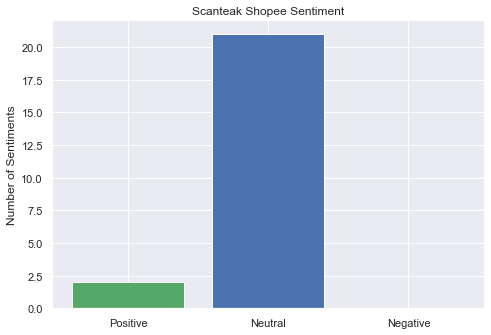

In [19]:
sns.set(style="darkgrid")
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Scanteak Shopee Sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Positive", scanteak_df[scanteak_df['Sentiment'] == "Positive"].value_counts().sum(), color = 'g', width = 0.8)
ax.bar("Neutral", scanteak_df[scanteak_df['Sentiment'] == "Neutral"].value_counts().sum(), color = 'b', width = 0.8)
ax.bar("Negative", scanteak_df[scanteak_df['Sentiment'] == "Negative"].value_counts().sum(), color = 'r', width = 0.8)

<BarContainer object of 1 artists>

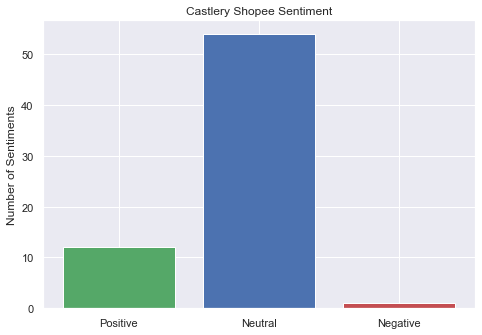

In [20]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Castlery Shopee Sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Positive", castlery_df[castlery_df['Sentiment'] == "Positive"].value_counts().sum(), color = 'g', width = 0.8)
ax.bar("Neutral", castlery_df[castlery_df['Sentiment'] == "Neutral"].value_counts().sum(), color = 'b', width = 0.8)
ax.bar("Negative", castlery_df[castlery_df['Sentiment'] == "Negative"].value_counts().sum(), color = 'r', width = 0.8)

<BarContainer object of 1 artists>

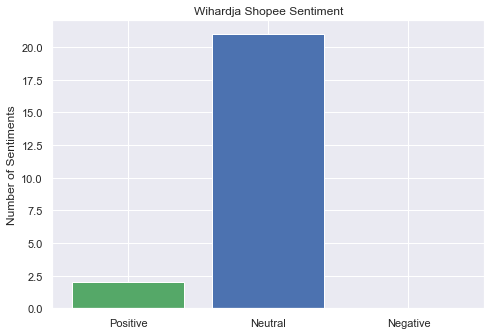

In [21]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Wihardja Shopee Sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Positive", wihardja_df[wihardja_df['Sentiment'] == "Positive"].value_counts().sum(), color = 'g', width = 0.8)
ax.bar("Neutral", wihardja_df[wihardja_df['Sentiment'] == "Neutral"].value_counts().sum(), color = 'b', width = 0.8)
ax.bar("Negative", wihardja_df[wihardja_df['Sentiment'] == "Negative"].value_counts().sum(), color = 'r', width = 0.8)